In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [8]:
df = pd.read_csv('diabetes.csv')

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [11]:
(df==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [12]:
columns_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_with_zero] = df[columns_with_zero].replace(0, np.nan)

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [15]:
df[columns_with_zero] = imputer.fit_transform(df[columns_with_zero])

In [16]:
(df==0).sum()


Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
print(df['Pregnancies'].describe())

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64


In [19]:
print(df['Pregnancies'].value_counts().sort_index())


Pregnancies
0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
Name: count, dtype: int64


In [20]:
bins = [ -1, 0, 2, 5, 10]

In [21]:
labels = ['None', 'Low', 'Moderate', 'High']
df['PregGroup'] = pd.cut(df['Pregnancies'], bins=bins, labels=labels)
df = df.drop(columns=['Pregnancies'])

In [22]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PregGroup
0,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,High
1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,Low
2,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,High
3,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,Low
4,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,None


In [23]:
df = pd.get_dummies(df, columns=['PregGroup'], drop_first=True)

In [24]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PregGroup_Low,PregGroup_Moderate,PregGroup_High
0,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,False,False,True
1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,True,False,False
2,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,False,False,True
3,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,True,False,False
4,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0,False,False,True
764,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0,True,False,False
765,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0,False,True,False
766,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1,True,False,False


In [25]:
IV =df.drop('Outcome', axis=1)

In [26]:
IV

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,PregGroup_Low,PregGroup_Moderate,PregGroup_High
0,148.0,72.0,35.00000,155.548223,33.6,0.627,50,False,False,True
1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,True,False,False
2,183.0,64.0,29.15342,155.548223,23.3,0.672,32,False,False,True
3,89.0,66.0,23.00000,94.000000,28.1,0.167,21,True,False,False
4,137.0,40.0,35.00000,168.000000,43.1,2.288,33,False,False,False
...,...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.00000,180.000000,32.9,0.171,63,False,False,True
764,122.0,70.0,27.00000,155.548223,36.8,0.340,27,True,False,False
765,121.0,72.0,23.00000,112.000000,26.2,0.245,30,False,True,False
766,126.0,60.0,29.15342,155.548223,30.1,0.349,47,True,False,False


In [27]:
DV = df['Outcome']

In [28]:
DV

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test =train_test_split(IV, DV, test_size=0.2, random_state=42)

In [31]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [32]:
print(type(model))

<class 'sklearn.naive_bayes.GaussianNB'>


In [33]:
model.fit(X_train, y_train)

GaussianNB()

In [34]:
model.score(X_test, y_test)

0.7337662337662337

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [36]:
y_pred = model.predict(X_test)

In [37]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7337662337662337


In [38]:
print("\nClassification Report:\n"")", classification_report(y_test, y_pred))


Classification Report:
)               precision    recall  f1-score   support

           0       0.79      0.80      0.79        99
           1       0.63      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [39]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[79 20]
 [21 34]]


In [40]:
con_mat= confusion_matrix(y_test, y_pred)

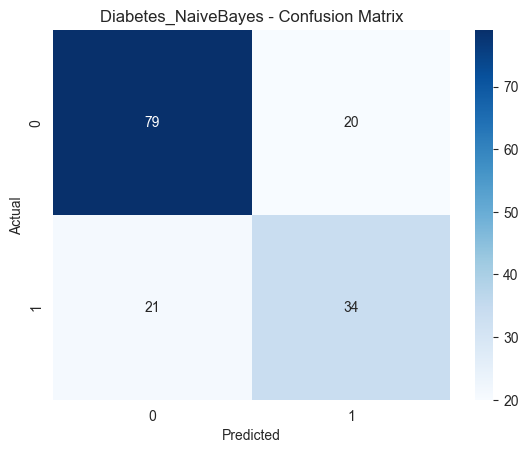

In [41]:
sns.heatmap(con_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Diabetes_NaiveBayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [42]:
y_probs = model.predict_proba(X_test)[:,1]

In [43]:
sorted_indices = np.argsort(y_probs)

In [44]:
sorted_probs = y_probs[sorted_indices]

In [45]:
sorted_actual = y_test.to_numpy()[sorted_indices]

In [46]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

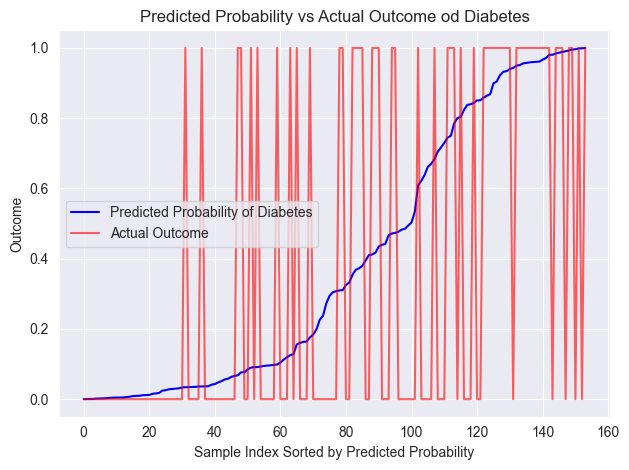

In [47]:
plt.plot(sorted_probs, label ='Predicted Probability of Diabetes' , color ='blue')
plt.plot(sorted_actual, label = 'Actual Outcome', color='red', alpha=0.6)
plt.title('Predicted Probability vs Actual Outcome od Diabetes')
plt.xlabel('Sample Index Sorted by Predicted Probability')
plt.ylabel('Outcome')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()